# Exercise class 3

## Simple neural networks with PyTorch

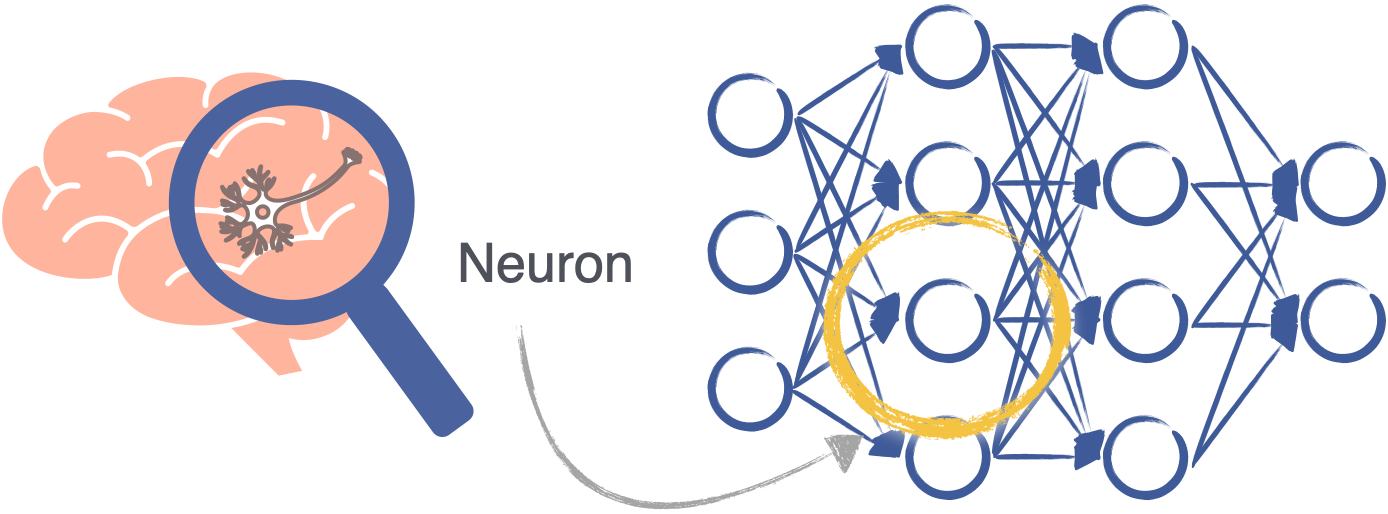

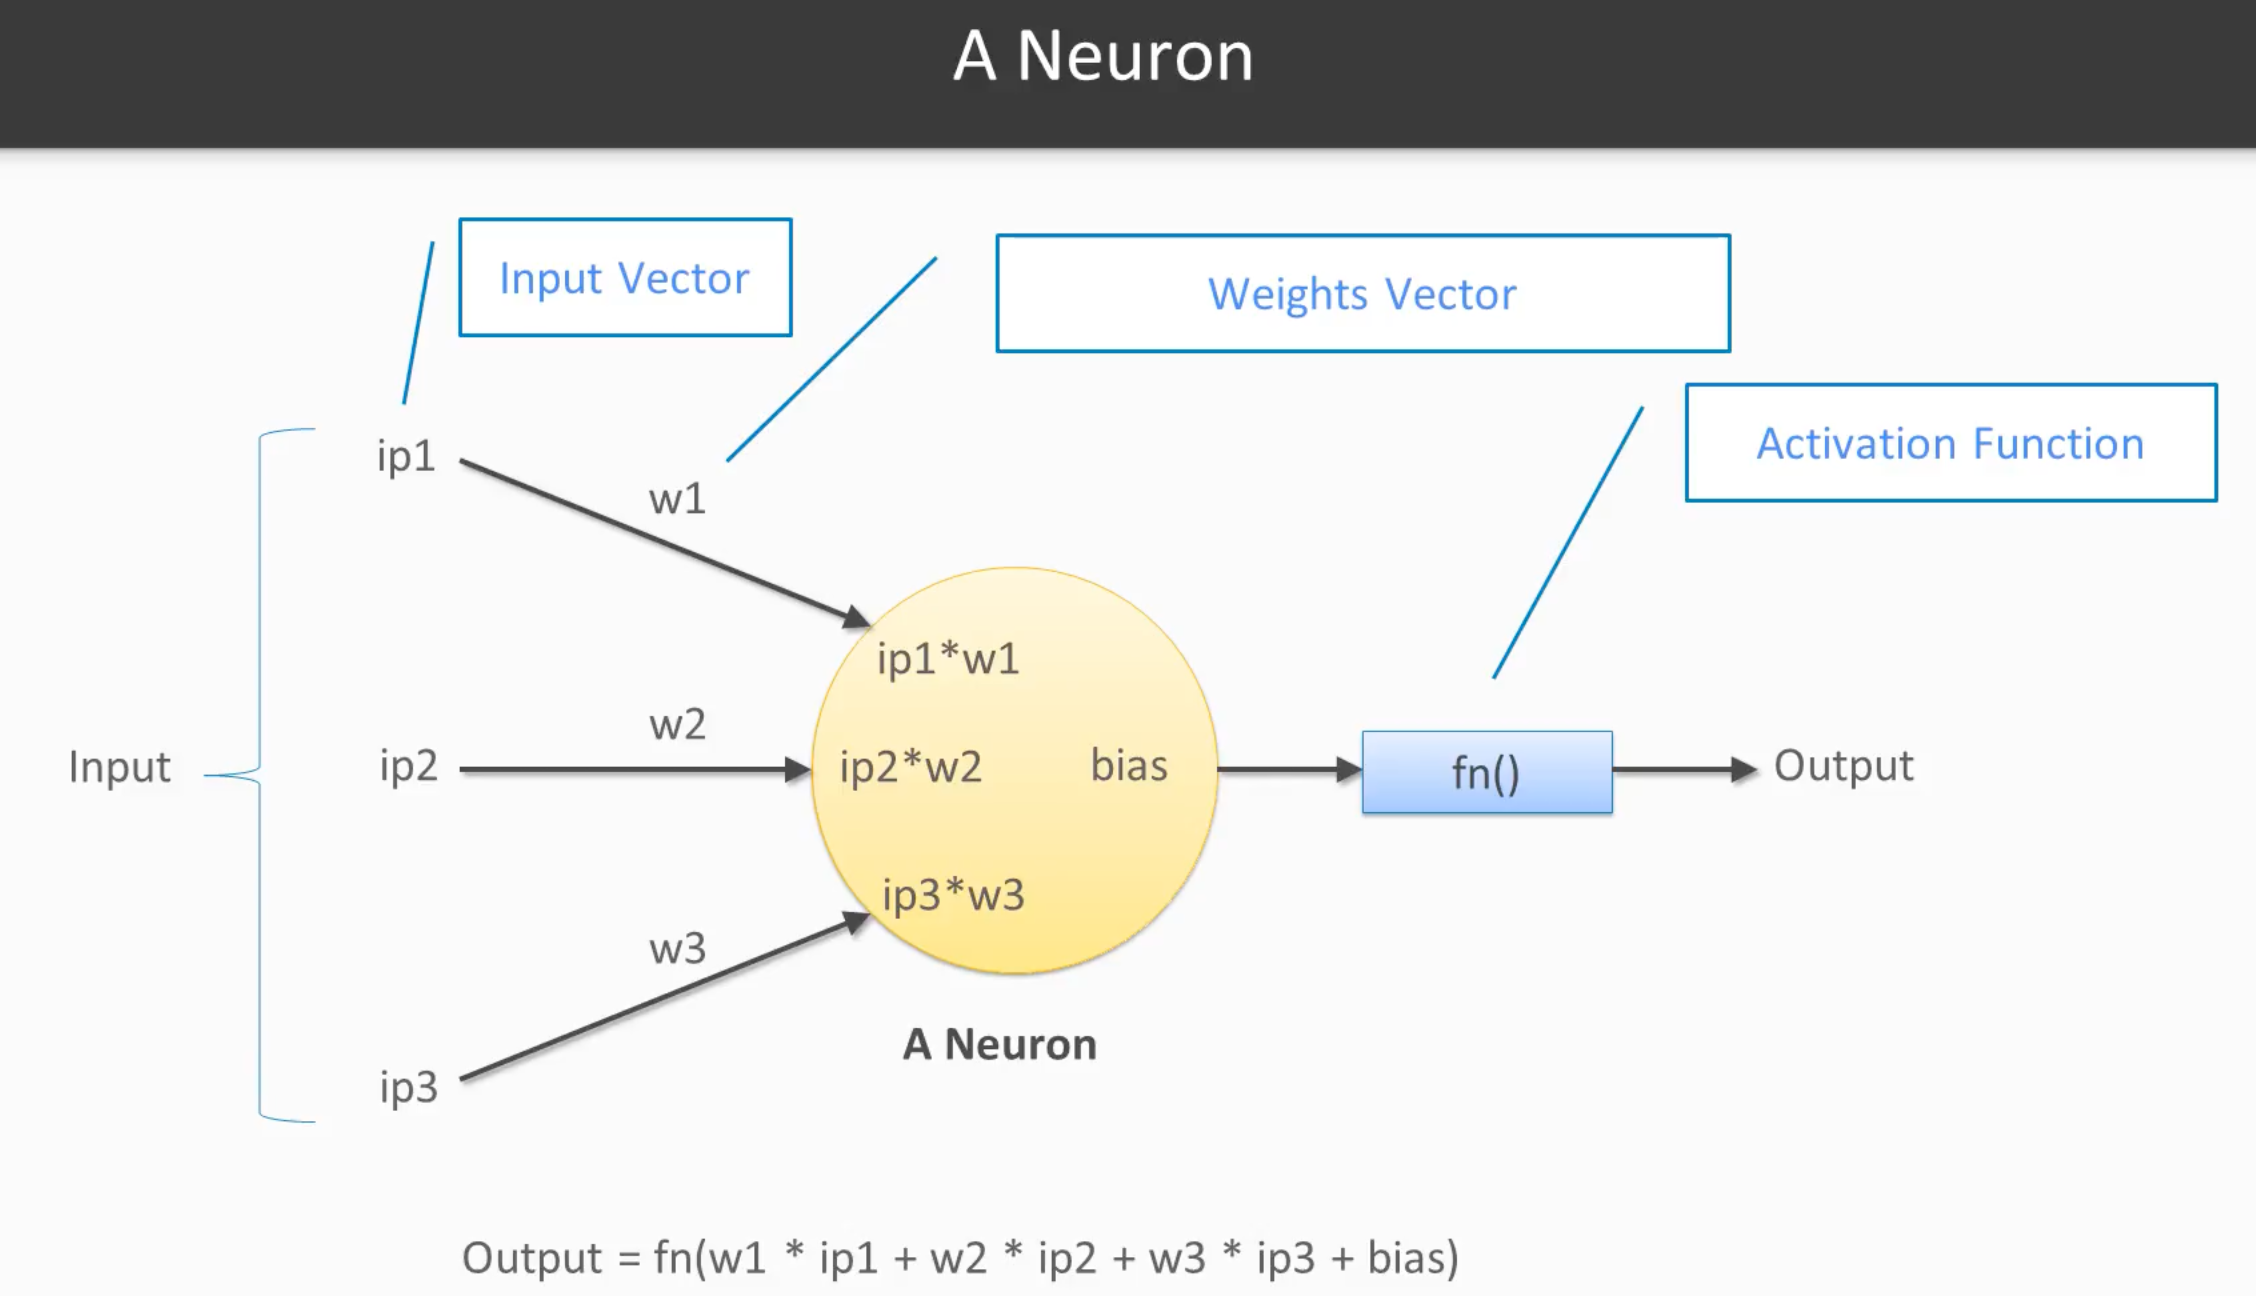

Source: https://www.youtube.com/watch?v=VZyTt1FvmfU 

What do we need? 

- prepared data 
- network architecture
- further hyperparameters (loss function, activation function, weight initialization, ...)

## Let's start with some data

In [13]:
import torch
import matplotlib.pyplot as plt

# make fake data
n_data = torch.ones(128, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
t0 = torch.zeros(128)               # class0 t data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
t1 = torch.ones(128)                # class1 t data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
t = torch.cat((t0, t1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

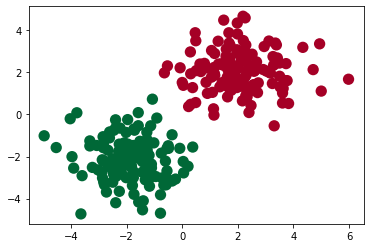

In [14]:
plt.scatter(x[:,0], x[:,1], c=t, s=128, lw=0, cmap='RdYlGn')
plt.show()

### Creating a Custom Dataset for your files

A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.
- The __init__ function is run once when instantiating the Dataset object. 
- The __len__ function returns the number of samples in our dataset.
- The __getitem__ function loads and returns a sample from the dataset at the given index

In [15]:
from torch.utils.data import Dataset

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, x, t):
        self.x = x
        self.t = t
       
    def __getitem__(self, index):
        return self.x[index], self.t[index]
   
    def __len__(self):
        return self.x.shape[0]

In [16]:
Data(x,t)

### Preparing our data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [17]:
from torch.utils.data import DataLoader

data = Data(x,t)
dataloader = DataLoader(data, batch_size=32, shuffle=True)

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of features and labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled.

Feature batch shape: torch.Size([32, 2])
Labels batch shape: torch.Size([32])


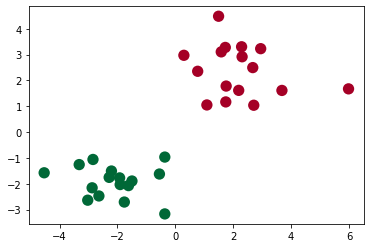

In [18]:
# Display feature and label.
features, labels = next(iter(dataloader))
print(f"Feature batch shape: {features.size()}")
print(f"Labels batch shape: {labels.size()}")

plt.scatter(features[:,0], features[:,1], c=labels, s=128, lw=0, cmap='RdYlGn')
plt.show()

## Let's start building a network

In [19]:
simple_network = torch.nn.Sequential(
  # first layer (input dim, hidden units)
  torch.nn.Linear(2, 2),
  # activation function
  torch.nn.ReLU(),   
  # output layer (hidden units, output dim)
  torch.nn.Linear(2, 2) 
)

print(simple_network)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=2, bias=True)
)


In [20]:
# extract the parameters that we want to optimize
learnable_parameters = simple_network.parameters()

# select an optimizer and pass on these learnable parameters
optimizer = torch.optim.SGD(learnable_parameters, lr=0.02)

# select an appropriate loss function
loss_func = torch.nn.CrossEntropyLoss()

In [21]:
# take a look at the parameters of our model
for name, param in simple_network.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: 0.weight | Size: torch.Size([2, 2]) | Values : tensor([[ 0.0262,  0.1707],
        [-0.0028,  0.0373]], grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([2]) | Values : tensor([-0.6659,  0.6882], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([2, 2]) | Values : tensor([[ 0.5634, -0.6256],
        [-0.4568,  0.1172]], grad_fn=<SliceBackward0>) 

Layer: 2.bias | Size: torch.Size([2]) | Values : tensor([0.3058, 0.6107], grad_fn=<SliceBackward0>) 



## Finally: train the model!

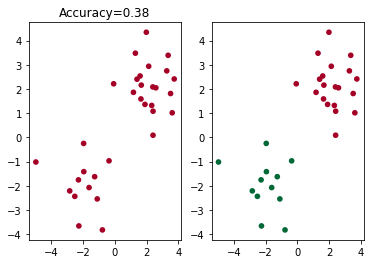

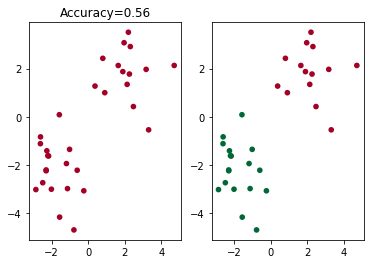

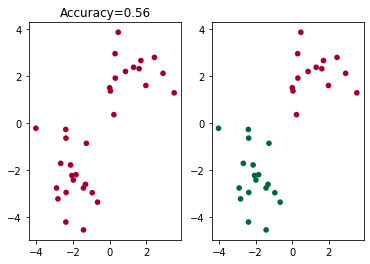

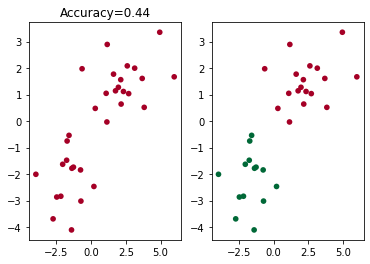

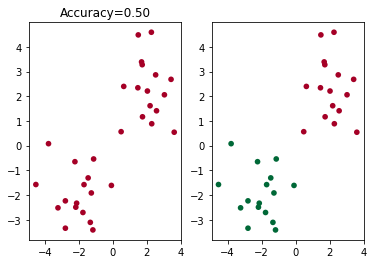

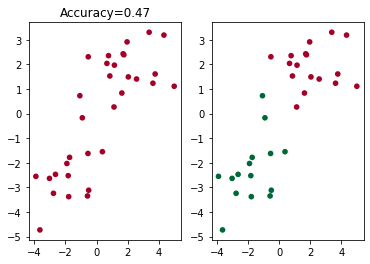

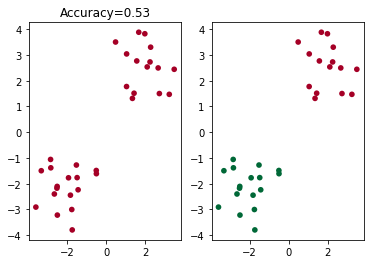

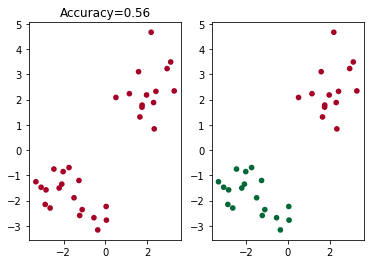

In [22]:
plt.ion()   # something about plotting

for epoch in range(2): # run over several epochs
  for inputs, labels in dataloader:
    y = simple_network(inputs)      # input x and predict based on x
    loss = loss_func(y, labels)     # must be (1. nn output, 2. target)

    
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    optimizer.zero_grad()   # clear gradients for next train

    if epoch % 2 == 0:
        # plot and show learning process
        plt.cla()
        plt.subplot(1,2,1)
        prediction = torch.max(y, 1)[1]
        plt.scatter(inputs[:, 0], inputs[:, 1], c=prediction, s=32, lw=0, cmap='RdYlGn')
        accuracy = (prediction == labels).sum().item()/labels.shape[0]
        plt.title('Accuracy=%.2f' % accuracy)

        plt.subplot(1,2,2)

        plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, s=32, lw=0, cmap='RdYlGn')

        plt.pause(0.1)

plt.ioff()
plt.show()

## Let's look at the final result...

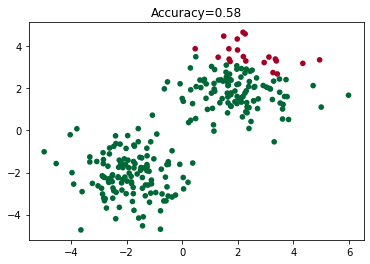

In [23]:
y = simple_network(x)      # input x and predict based on x
prediction = torch.max(y, 1)[1]
plt.scatter(x[:, 0], x[:, 1], c=prediction, s=32, lw=0, cmap='RdYlGn')
accuracy = (prediction == t).sum().item()/t.shape[0]
plt.title('Accuracy=%.2f' % accuracy)
plt.show()

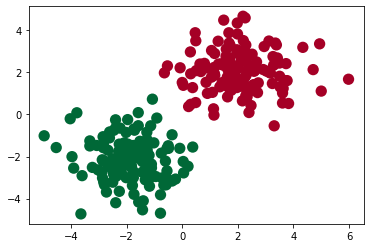

In [24]:
plt.scatter(x[:,0], x[:,1], c=t, s=128, lw=0, cmap='RdYlGn')
plt.show()